In [1]:
import scipy.optimize
import numpy as np
import cma
from matplotlib import pyplot as plt

In [2]:
ttt_bfgs = {}
ttt_cg = {}
ttt_cma = {}

In [3]:
dim = 10
finaltolf = 1e-6
x0 = [10]*dim
#x0 = -20 + 100*np.random.rand(dim)


def ellirotated(x, cond=1):
    return cma.ff.elli(np.array(x), 1, cond=cond)

def ellirotated_forthroot(x, cond=1):
    return (ellirotated(x, cond=cond))**(1/4)

def ellirotated_squared(x, cond=1):
    return (ellirotated(x, cond=cond))**2

functions = [cma.ff.elli,
             ellirotated,
             ellirotated_forthroot,
             #ellirotated_squared
            ]



condition_numbers = [1, 10, 100, 1000, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10]
#condition_numbers = [1, 10, 100, 1000, 1e4, 1e5, 1e6] # use for short experiment


for ff in functions:
    tt_bfgs = {}
    tt_cg = {}
    tt_cma = {}

    # adjust stopping criterion if objective values are scaled:
    if ff.__name__ is 'ellirotated_forthroot':
        tolf = finaltolf**4
    elif ff.__name__ is 'ellirotated_squared':
        tolf = finaltolf**(1/2)
    else:
        # otherwise, use default:
        tolf = finaltolf
    
    for c in condition_numbers:
        t = scipy.optimize.minimize(lambda x: ff(x, cond=c), x0, method='CG', tol=tolf)
        tt_cg[c] = t.nfev
        t = scipy.optimize.minimize(lambda x: ff(x, cond=c), x0, method='BFGS', tol=tolf)
        tt_bfgs[c] = t.nfev
        [xbest, es] = cma.fmin2(lambda x: ff(x, cond=c), x0, 1, options={'tolfun': tolf})
        tt_cma[c] = es.countevals
    
    # store everything for later use:
    ttt_bfgs[ff] = tt_bfgs
    ttt_cg[ff] = tt_cg
    ttt_cma[ff] = tt_cma


    

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=1094384, Wed Nov  3 21:33:16 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 9.143082131197789e+02 1.0e+00 9.48e-01  9e-01  1e+00 0:00.0
    2     20 8.315417571339493e+02 1.2e+00 9.86e-01  9e-01  1e+00 0:00.0
    3     30 7.702407167492140e+02 1.3e+00 1.04e+00  9e-01  1e+00 0:00.0
  100   1000 3.333181586321059e-04 1.8e+00 1.09e-02  4e-03  6e-03 0:00.2
  171   1710 3.388494308330728e-09 2.0e+00 7.63e-05  2e-05  2e-05 0:00.3
termination on tolfun=1e-06 (Wed Nov  3 21:33:17 2021)
final/bestever f-value = 2.996198e-09 2.458228e-09
incumbent solution: [-4.37985194e-06 -2.72864237e-05  2.21948594e-05 -1.41890750e-05
  1.20297739e-05  3.68401023e-06 -1.59910336e-05  2.67484305e-05 ...]
std deviations: [1.79180263e-05 1.98610092e-05 1.79852034e-05 1.76663775e-05
 1.72583863e-05 1.75299920e-05 1.78995445e-05 1.86326875e-05 ...]
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=1093238,

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=1054676, Wed Nov  3 21:33:40 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 7.671561503920647e+09 1.0e+00 1.03e+00  1e+00  1e+00 0:00.0
    2     20 6.586230032067211e+09 1.3e+00 1.16e+00  1e+00  1e+00 0:00.0
    3     30 4.743110216017528e+09 1.3e+00 1.28e+00  1e+00  1e+00 0:00.0
  100   1000 5.519225506982756e+05 3.3e+01 2.59e-01  2e-02  4e-01 0:00.2
  200   2000 5.625450067949569e+03 4.2e+02 2.78e-01  3e-03  8e-01 0:00.5
  300   3000 5.107439076965281e+02 1.3e+03 3.41e-02  1e-04  1e-01 0:00.7
  400   4000 3.009555437443727e+02 5.1e+03 1.81e-01  2e-04  7e-01 0:01.1
  500   5000 5.619197841728304e-03 9.6e+03 4.05e-03  2e-06  2e-02 0:01.5
NOTE (module=cma, iteration=536):  
condition in coordinate system exceeded 1.0e+08, rescaled to 1.0e+00, 
condition changed from 1.1e+08 to 2.9e+00
  600   6000 2.157704767983716e-09 1.9e+00 8.66e-06  2e-09  2e-05 0:01.8
termination on tolfun=1e-06 (

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=1096202, Wed Nov  3 21:34:08 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 2.451967821481763e+06 1.0e+00 9.98e-01  1e+00  1e+00 0:00.0
    2     20 2.047467995106517e+06 1.2e+00 1.11e+00  1e+00  1e+00 0:00.0
    3     30 1.744952792550556e+06 1.3e+00 1.31e+00  1e+00  1e+00 0:00.0
  100   1000 1.193936345329457e+02 1.6e+01 3.12e-01  2e-01  4e-01 0:00.3
  200   2000 1.688953186025091e-02 8.4e+01 1.45e-02  6e-03  2e-02 0:00.6
  300   3000 5.156081360948879e-09 9.5e+01 3.00e-05  5e-06  2e-05 0:01.0
  309   3090 9.976965093362481e-10 9.7e+01 1.33e-05  2e-06  7e-06 0:01.1
termination on tolfun=1e-06 (Wed Nov  3 21:34:10 2021)
final/bestever f-value = 1.191399e-09 9.976965e-10
incumbent solution: [ 3.90577211e-06  3.78368563e-06 -2.85219600e-06 -3.16176453e-06
  2.60243455e-06  9.22203444e-07 -3.94466853e-07 -3.65214522e-06 ...]
std deviations: [4.03527836e-06 3.79558401e-06 3.54054170e-06 7

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=1020070, Wed Nov  3 21:34:55 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 5.505893141730006e+00 1.0e+00 9.50e-01  9e-01  1e+00 0:00.0
    2     20 5.407100555610392e+00 1.2e+00 9.43e-01  9e-01  1e+00 0:00.0
    3     30 5.339029826209809e+00 1.2e+00 9.71e-01  9e-01  1e+00 0:00.0
  100   1000 1.594942927379515e-01 2.0e+00 2.09e-02  9e-03  1e-02 0:00.3
  200   2000 3.390726656294782e-03 2.1e+00 1.73e-05  3e-06  4e-06 0:00.8
  300   3000 8.513929916857353e-05 1.9e+00 3.02e-08  2e-09  3e-09 0:01.0
  373   3730 4.539596652198943e-06 1.7e+00 1.88e-10  7e-12  9e-12 0:01.3
termination on tolx=1e-11 (Wed Nov  3 21:34:58 2021)
final/bestever f-value = 3.716481e-06 3.716481e-06
incumbent solution: [ 3.96483701e-13  3.63462219e-12  5.86834453e-14 -4.06779320e-12
 -2.07185683e-12  8.07857440e-12  7.30209087e-13 -3.21714534e-12 ...]
std deviations: [6.65001336e-12 7.23723023e-12 7.79489086e-12 7.1

    1     10 1.972804044894851e+02 1.0e+00 9.28e-01  9e-01  1e+00 0:00.0
    2     20 1.884734896241476e+02 1.2e+00 1.01e+00  9e-01  1e+00 0:00.0
    3     30 1.831372682654442e+02 1.4e+00 1.10e+00  1e+00  1e+00 0:00.0
  100   1000 2.299405352084696e+01 2.5e+01 8.27e-01  4e-01  1e+00 0:00.4
  200   2000 5.900087168441913e+00 2.2e+02 1.13e-01  4e-02  2e-01 0:00.8
  300   3000 2.247600586992359e+00 1.3e+03 8.95e-02  4e-02  3e-01 0:01.3
  400   4000 1.046655571017071e-01 3.2e+03 8.38e-04  3e-04  2e-03 0:01.9
  500   5000 3.231172391991113e-03 3.3e+03 1.97e-06  4e-07  2e-06 0:02.3
  600   6000 6.997233475749584e-05 3.3e+03 2.84e-09  2e-10  1e-09 0:02.7
  664   6640 6.036850937252649e-06 4.2e+03 3.68e-11  1e-12  1e-11 0:03.0
termination on tolx=1e-11 (Wed Nov  3 21:35:51 2021)
final/bestever f-value = 5.390653e-06 5.390653e-06
incumbent solution: [ 4.18901737e-12  3.02482549e-12 -1.55686653e-12 -6.22107410e-12
 -5.19592695e-13  6.00173120e-12  3.58690612e-12 -6.45675499e-12 ...]
std deviati

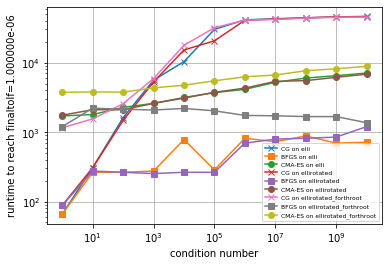

In [4]:
for ff in ttt_cma.keys():

    plt.loglog(list(ttt_cg[ff].keys()), list(ttt_cg[ff].values()), 'x-', label='CG on %s' % ff.__name__)
    plt.loglog(list(ttt_bfgs[ff].keys()), list(ttt_bfgs[ff].values()), 's-', label='BFGS on %s' % ff.__name__)
    plt.loglog(list(ttt_cma[ff].keys()), list(ttt_cma[ff].values()), 'o-', label='CMA-ES on %s' % ff.__name__)
    plt.grid()
    plt.xlabel('condition number')
    plt.ylabel('runtime to reach finaltolf=%e' % finaltolf)
    plt.legend(fontsize=6)